Polarity, in the context of natural language processing (NLP), refers to identifying the sentiment expressed in a piece of text, whether it's positive, negative, or neutral. This concept is crucial in various applications, such as analyzing customer feedback, understanding public sentiment on social media, or even in literature and film reviews analysis.

While spaCy is a powerful library for many NLP tasks, it doesn't natively provide sentiment analysis or polarity detection. For this purpose, we can integrate spaCy with other libraries like TextBlob or VADER (Valence Aware Dictionary and sEntiment Reasoner), which are specifically designed for sentiment analysis.

In this detailed example, I'll demonstrate how to use TextBlob for polarity detection because of its simplicity and effectiveness for educational purposes. TextBlob essentially provides a simple API for common NLP tasks, including sentiment analysis, where the sentiment property returns a namedtuple of the form Sentiment(polarity, subjectivity). The polarity score is a float within the range [-1.0, 1.0], where -1 indicates negative sentiment and +1 indicates positive sentiment.

In [5]:
!pip3 install spacy textblob
!python3 -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 1.2 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [7]:
import spacy
from textblob import TextBlob

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")


In [8]:
def analyze_polarity(text):
    # Preprocess the text with spaCy
    doc = nlp(text)
    
    # Analyze sentiment with TextBlob
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    
    return polarity

In [9]:
text = "I love this product. It works great and has made my life so much easier!"
polarity_score = analyze_polarity(text)

if polarity_score > 0:
    sentiment = 'positive'
elif polarity_score < 0:
    sentiment = 'negative'
else:
    sentiment = 'neutral'

print(f"Text: {text}\nPolarity score: {polarity_score}\nSentiment: {sentiment}")

Text: I love this product. It works great and has made my life so much easier!
Polarity score: 0.5166666666666667
Sentiment: positive


## How Polarity Works in the Background

In the background, when a piece of text is analyzed for sentiment:

1. **Preprocessing:** The text is preprocessed (cleaned and transformed) using NLP techniques to ensure it's in a suitable format for analysis. This might involve spaCy for advanced NLP tasks.
2. **Feature Extraction:** The preprocessed text is converted into a numerical format that the model understands.
3. **Sentiment Scoring:** The ML model uses the extracted features to calculate a sentiment score based on the patterns it learned during training.
4. **Output:** The sentiment score is then mapped to a polarity (positive, negative, neutral) based on predefined thresholds.

## Visualizing Polarity and Sentiment Analysis

In [12]:
!pip3 install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 2.7 MB/s eta 0:00:00a 0:00:01


In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from collections import defaultdict

In [22]:
sentences = [
    "I love this product. It works great and has made my life so much easier!",
    "This is the worst movie I have ever seen. Completely disappointed.",
    "What a fantastic experience! Truly memorable and enjoyable.",
    "I'm so sad this vacation is over, it was terrible from start to finish.",
    "The customer service was amazing and very helpful.",
    "The food was bland and I'm unhappy with the service.",
    "Absolutely a joy to use. I'm very satisfied with the performance."
]

In [23]:
# Initialize dictionaries to hold positive and negative words
positive_words = defaultdict(int)
negative_words = defaultdict(int)

In [24]:
for sentence in sentences:
    blob = TextBlob(sentence)
    polarity = blob.sentiment.polarity
    words = sentence.split()
    
    # Categorize words based on the sentence's overall polarity
    if polarity > 0:
        for word in words:
            positive_words[word.lower()] += 1
    elif polarity < 0:
        for word in words:
            negative_words[word.lower()] += 1

In [25]:
pos_wordcloud = WordCloud(width=400, height=200, background_color ='white').generate_from_frequencies(positive_words)
neg_wordcloud = WordCloud(width=400, height=200, background_color ='white').generate_from_frequencies(negative_words)

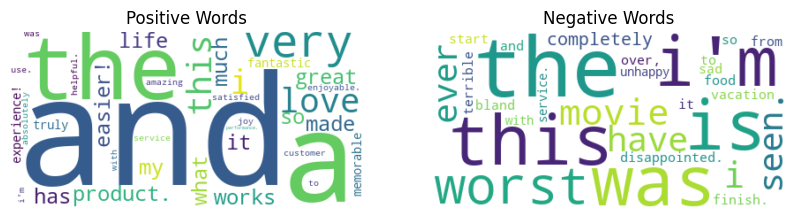

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(pos_wordcloud, interpolation='bilinear')
ax[0].set_title('Positive Words')
ax[0].axis('off')

ax[1].imshow(neg_wordcloud, interpolation='bilinear')
ax[1].set_title('Negative Words')
ax[1].axis('off')

plt.show()